In [ ]:
import os, time
from tqdm import tqdm
import numpy as np
from scipy import ndimage
from librosa.sequence import dtw
#import pyvista as pv
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
facies = np.load('data/facies.npy')
nrealizations, nx, ny, nz = facies.shape
print('Facies: {}'.format(facies.shape))

Facies: (318, 256, 256, 128)


In [3]:
cmap, interp = 'binary', 'bicubic'

In [4]:
sample = 222
d = ndimage.gaussian_filter(facies[sample], sigma=0.33)
print('Sample: {}'.format(sample))

Sample: 222


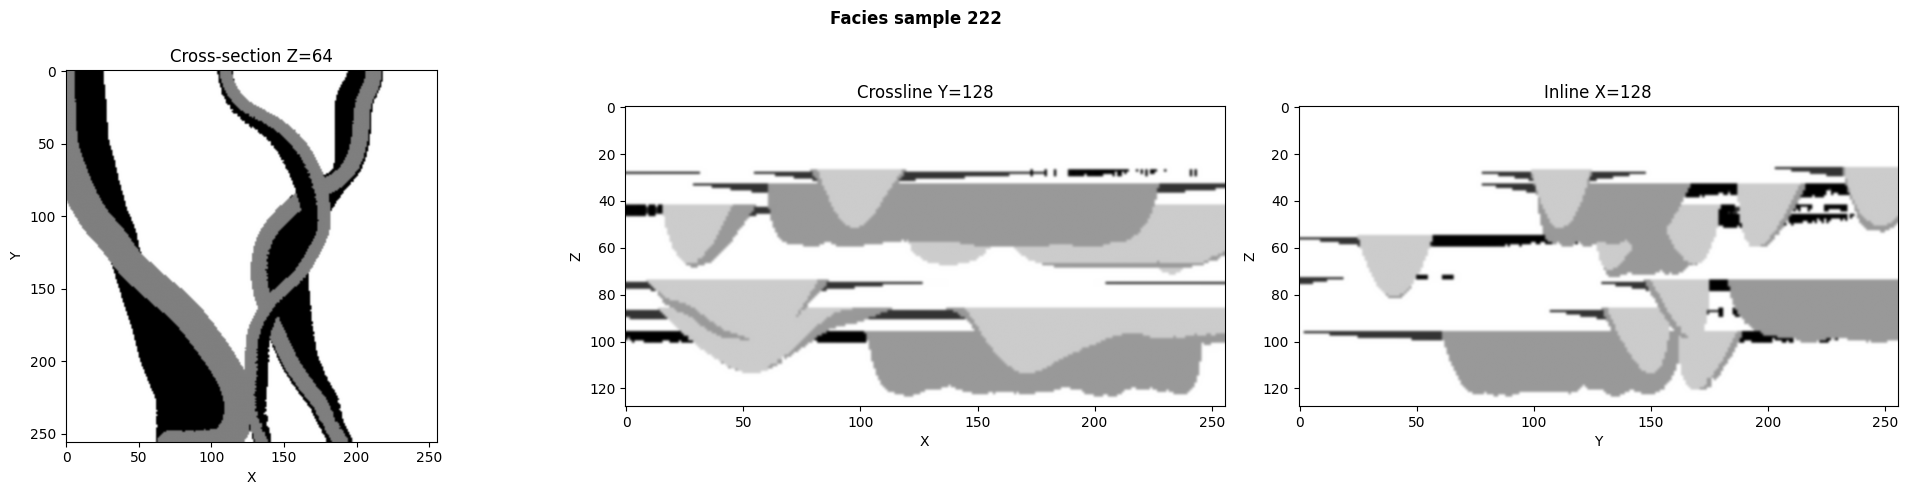

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.imshow(d[:,:,64], cmap=cmap, interpolation=interp)
plt.title('Cross-section Z=64')
plt.xlabel('X'); plt.ylabel('Y')

plt.subplot(132)
plt.imshow(d[:,128,:].T, cmap=cmap, interpolation=interp)
plt.title('Crossline Y=128')
plt.xlabel('X'); plt.ylabel('Z')

plt.subplot(133)
plt.imshow(d[128,:,:].T, cmap=cmap, interpolation=interp)
plt.title('Inline X=128')
plt.xlabel('Y'); plt.ylabel('Z')

plt.suptitle('Facies sample {}'.format(sample), weight='bold')
plt.tight_layout()
plt.savefig('figures/xyz-maps.png', dpi=600)
plt.show()

In [6]:
nwells = 5
extent = (15, 255-16)

# Wells (x,y) coordinates
depth = np.arange(d.shape[-1]) + 1000
wx, wy = np.random.randint(extent[0], extent[1], size=(2,nwells))
print('Wells (x,y): ({}, {})'.format(wx, wy))

# Well logs (clean, noisy)
well_log = d[wy, wx, :]
noise_log = d[wy, wx, :] + np.random.normal(0, 0.2*d.std(), d.shape[-1])

Wells (x,y): ([220 127 236 115 114], [213  62  32 200  79])


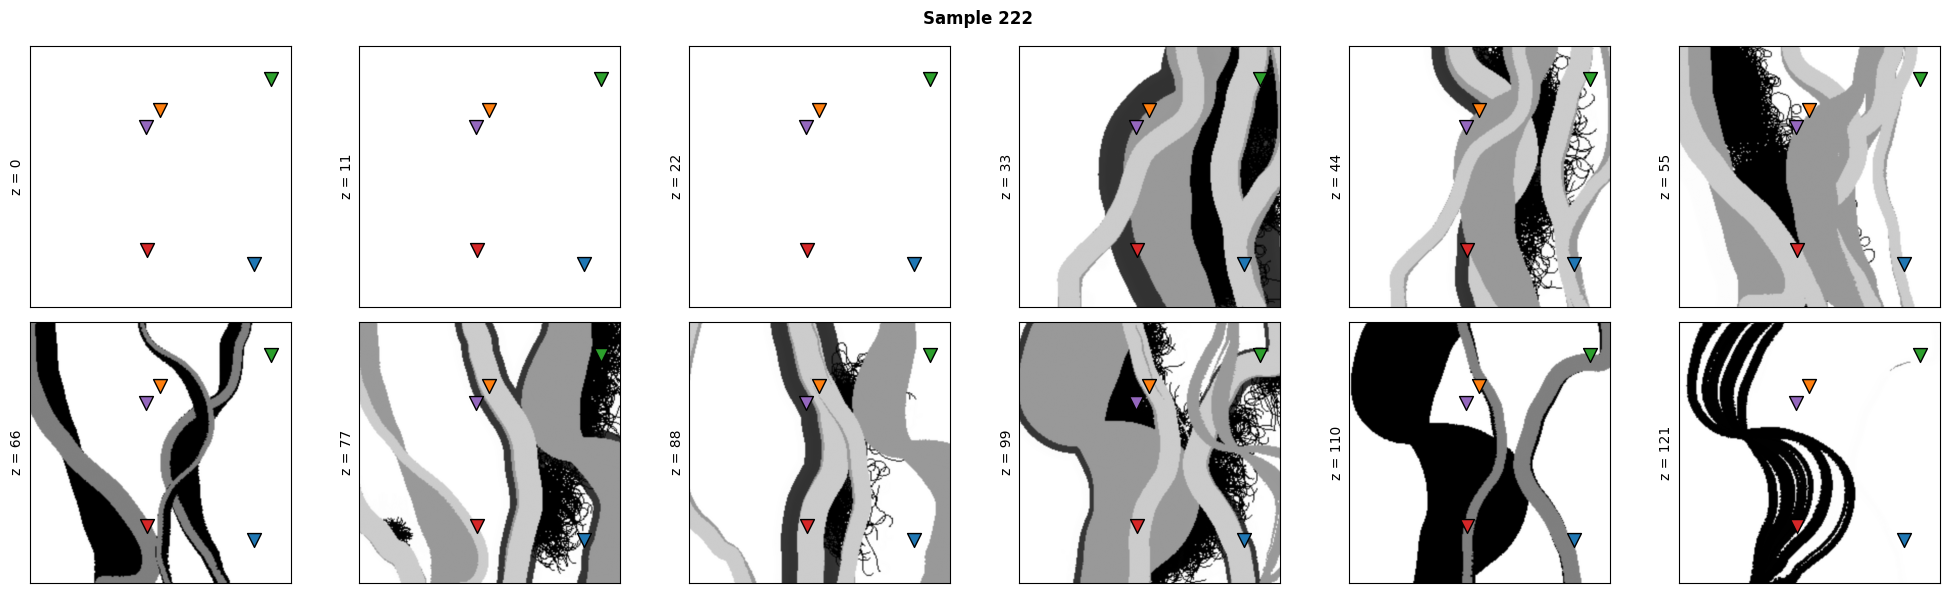

In [7]:
plt.figure(figsize=(20,6))
for i in range(12):
    plt.subplot(2, 6, i+1)
    k = i * 11
    plt.imshow(d[...,k], cmap=cmap, interpolation=interp)
    [plt.scatter(wx[i], wy[i], marker='v', edgecolor='k', c='C{}'.format(i), s=100) for i in range(nwells)]
    plt.xticks([]); plt.yticks([])
    plt.ylabel('z = {}'.format(k))
plt.suptitle('Sample {}'.format(sample), weight='bold')
plt.tight_layout()
plt.savefig('figures/aerial-wells.png', dpi=600)
plt.show()

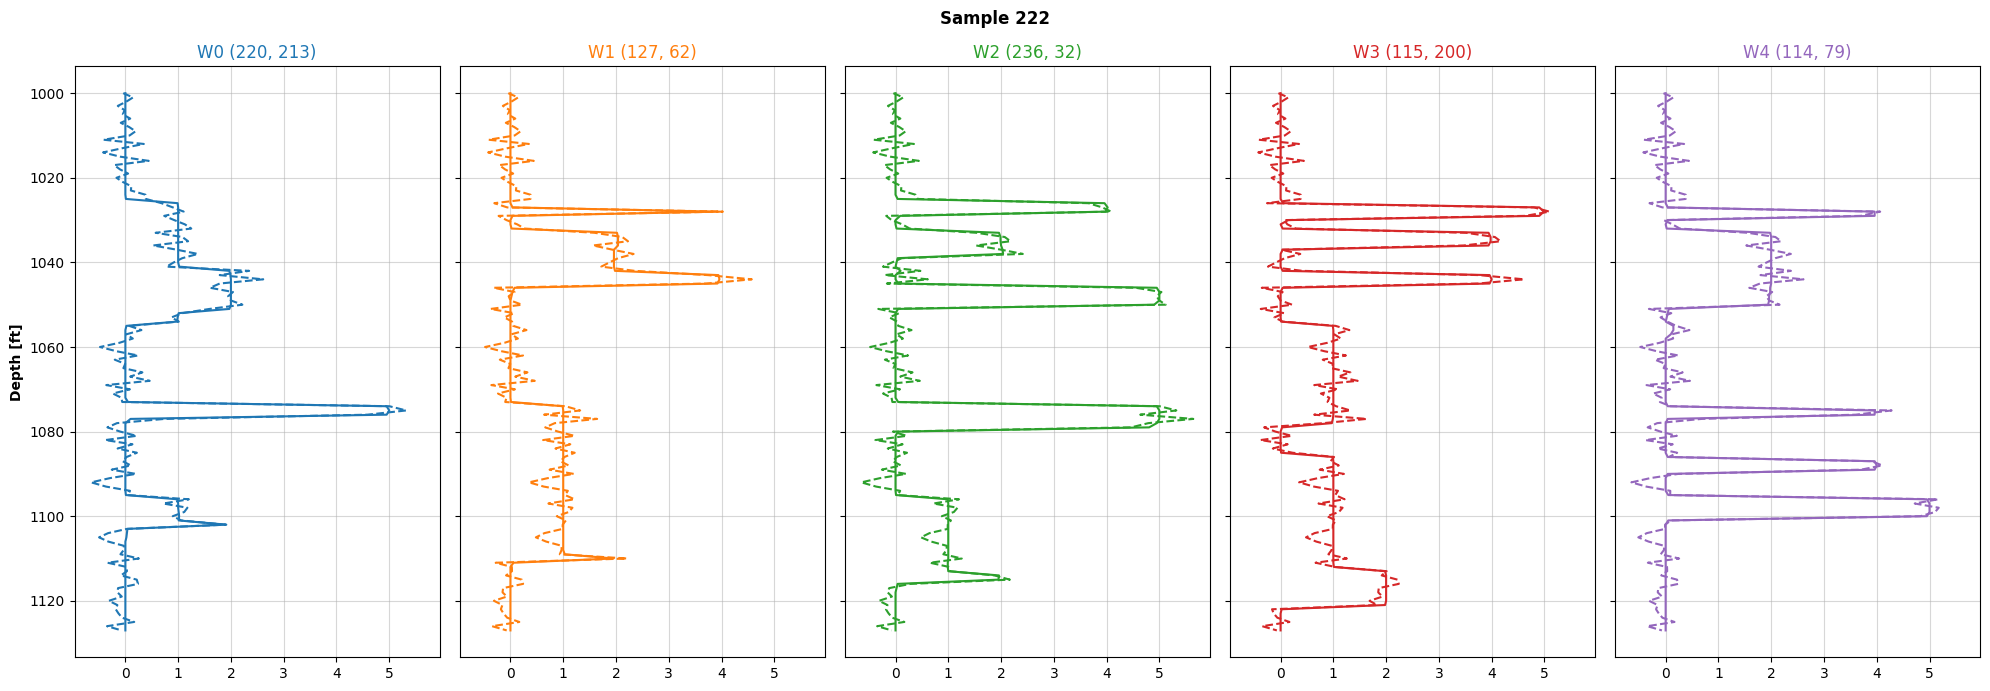

In [8]:
fig, axs = plt.subplots(1, nwells, figsize=(20, 7), sharex=True, sharey=True)
for i, (x, y) in enumerate(zip(wx, wy)):
    axs[i].plot(well_log[i], depth, c='C{}'.format(i))
    axs[i].plot(noise_log[i], depth, c='C{}'.format(i), ls='--')
    axs[i].set_title('W{} ({}, {})'.format(i, x, y), color='C{}'.format(i))
    axs[i].grid(True, which='both', alpha=0.5)
axs[0].invert_yaxis()
axs[0].set_ylabel('Depth [ft]', weight='bold')
plt.suptitle('Sample {}'.format(sample), weight='bold')
plt.tight_layout()
plt.savefig('figures/logs.png', dpi=600)
plt.show()

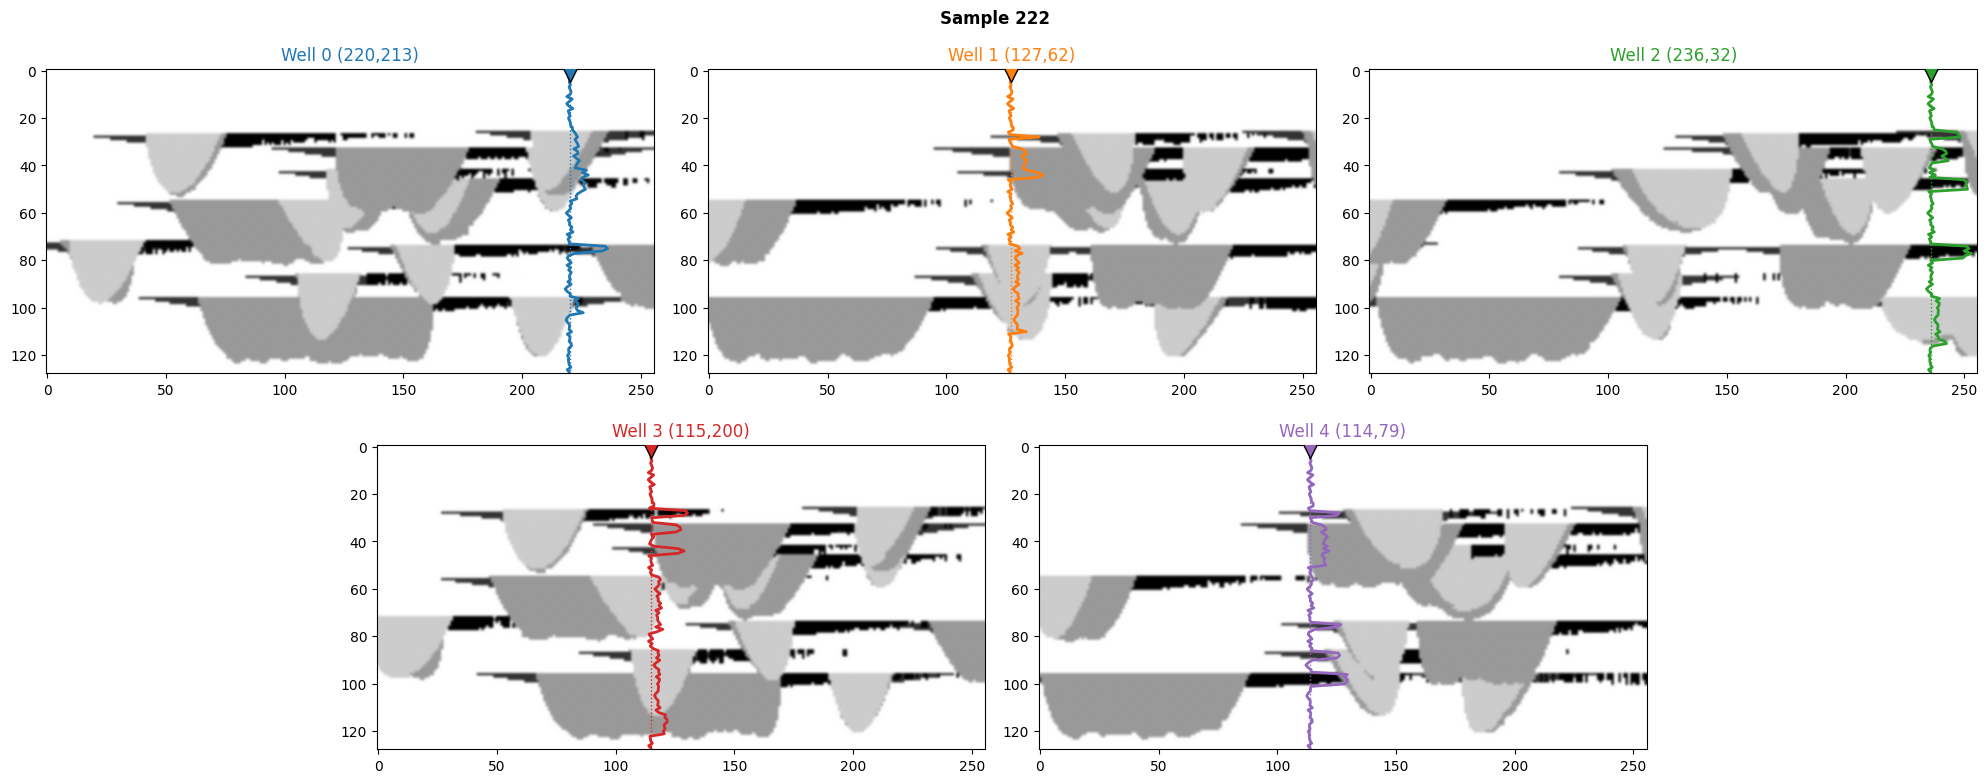

In [9]:
fig = plt.figure(figsize=(20, 8))
gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, :2]) 
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])
axs = [ax1, ax2, ax3, ax4, ax5]

wscale = 3
for i, ax in enumerate(axs):
    ax.set_title('Well {} ({},{})'.format(i, wx[i], wy[i]), color='C{}'.format(i))
    ax.imshow(d[wy[i]].T, cmap=cmap, interpolation=interp)
    ax.scatter(wx[i], 0, c='C{}'.format(i), marker='v', edgecolor='k', s=250, zorder=9)
    ax.plot(np.repeat(wx[i], nz), np.arange(nz), c='C{}'.format(i), lw=1, ls=':')
    ax.plot(np.repeat(wx[i], nz)+wscale*noise_log[i], np.arange(nz), c='C{}'.format(i), lw=2)
plt.suptitle('Sample {}'.format(sample), weight='bold')
plt.tight_layout()
plt.savefig('figures/logs-xsection.png', dpi=600)
plt.show()

***
### Dynamic Time Warping

In [10]:
from utils import plot_correlation

D: (128, 128) | wp: (195, 2)


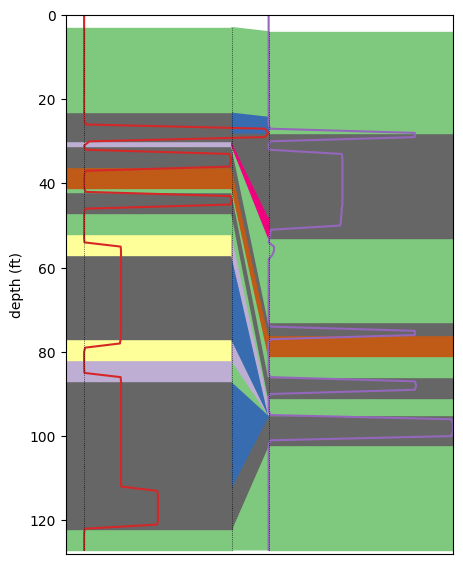

In [11]:
w1, w2 = well_log[3], well_log[4]

D, wp = dtw(w1, w2)
print('D: {} | wp: {}'.format(D.shape, wp.shape))
plot_correlation(w1, w2, wp, colors=['C3', 'C4'])

***
# END